In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.datasets import make_regression
import seaborn as sns

In [22]:
m1=np.asarray([0,0])
m2=np.asarray([6,5])

c1=np.asarray([[1,2.1],[1.2,1]])
c2=np.asarray([[1.2,1.2],[2.1,1.2]])

d1=np.random.multivariate_normal(m1,c1,500)
d2=np.random.multivariate_normal(m2,c2,500)

/home/aayush/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  import sys
/home/aayush/.local/lib/python3.5/site-packages/ipykernel_launcher.py:8: RuntimeWarning: covariance is not positive-semidefinite.
  


In [15]:
print(d1.shape)

(500, 2)


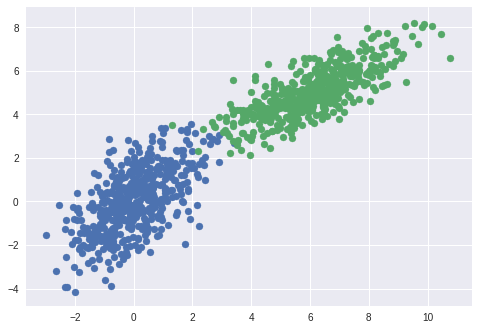

In [23]:
plt.figure(0)
plt.scatter(d1[:,0],d1[:,1])
plt.scatter(d2[:,0],d2[:,1])
plt.show()

In [26]:
r=d1.shape[0]+d2.shape[0]
c=d1.shape[1]+1
data=np.zeros((r,c))

data[:d1.shape[0],:2]=d1
data[d1.shape[0]:,:2]=d2

data[d1.shape[0]:,-1]=1.0

In [31]:
np.random.shuffle(data)

In [32]:
split=int(0.9*data.shape[0])

xtrain=data[:split,:2]
xtest=data[split:,:2]

ytrain=data[:split,-1]
ytest=data[split:,-1]

In [42]:
def hypo(x,w,b):
    h=((x*w).sum()+b)
    return sigmoid(h)


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-1.0 * z))


def err(y_true,x,w,b):
    er=0
    
    m=x.shape[0]
    
    for i in range(m):
        if y_true[i]==1:
            er-=np.log2(hypo(x[i],w,b))
        else:
            er-=np.log2(1.0-hypo(x[i],w,b))
    er/=m
    return er


def grad(y_true,x,w,b):
    gw=0
    gb=0
    
    m=x.shape[0]
    
    for i in range(m):
        gw-=(y_true[i]-hypo(x[i],w,b))*(x[i])
        gb-=(y_true[i]-hypo(x[i],w,b))
    gw/=m
    gb/=m
    return [gw,gb]


def grades(y_true,x,w,b,lrate=0.1):
    er=err(y_true,x,w,b)
    
    [gw,gb]=grad(y_true,x,w,b)
    
    w-=lrate*gw
    b-=lrate*gb
    
    return er,w,b

def predict(x,w,b):
    x=hypo(x,w,b)
    
    if x>=0.5:
        return 1
    else:
        return 0

def gacc(y_tst, x_tst ,w,B):
    y_pred = []
    for ix in range(y_tst.shape[0]):
        y_pred.append(predict(x_tst[ix], w, B))
    y_pred = np.asarray(y_pred)
    return float((y_pred==y_tst).sum())/y_tst.shape[0]

In [40]:
loss = []
acc = []
W = 2*np.random.random((xtrain.shape[1],))
b = 5*np.random.random()

print (W)
print (b)

[ 1.14078472  1.12412054]
3.440649808835237


In [43]:
for ix in range(100):
    l, W, b = grades(ytrain, xtrain, W, b, lrate=0.5)
    acc.append(gacc(ytest, xtest, W, b))
    loss.append(l)

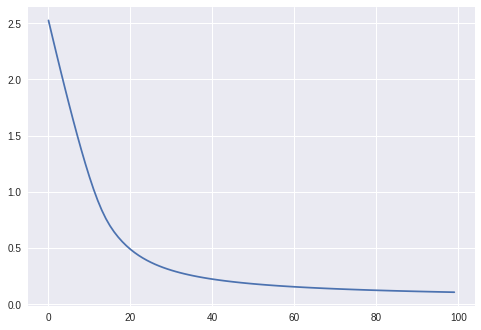

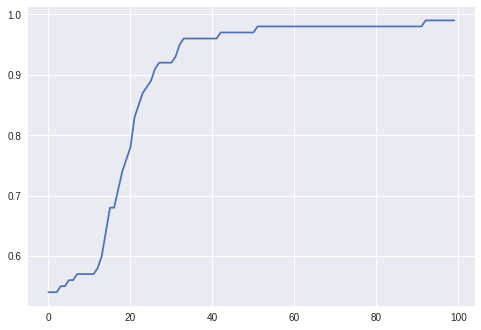

In [44]:
plt.figure(0)
plt.plot(loss)

plt.figure(1)
plt.plot(acc)